In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# I) Les vélos en libre-service 

### Velib - disponibilité en temps réel

Données disponibles au lien suivant : 
https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/export/?disjunctive.name&disjunctive.is_installed&disjunctive.is_renting&disjunctive.is_returning&disjunctive.nom_arrondissement_communes

In [3]:
velib = gpd.read_file("https://smartregionidf.opendatasoft.com/explore/dataset/velib-disponibilite-en-temps-reel/download/?format=geojson&timezone=Europe/Berlin&lang=fr")

### Cristolib et Vélo2 en libre-service à Créteil

Données disponibles aux liens suivants : 
- https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/information/


In [4]:
velos2 = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/jcdecaux-bike-stations-data/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

### Veligo

Données disponibles au lien suivant : https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/information/

In [5]:
veligo = gpd.read_file('https://smartregionidf.opendatasoft.com/explore/dataset/points-de-contact-veligo-location/download/?format=geojson&timezone=Europe/Berlin&lang=fr')

### Fusion des bases de données Vélib, Veligo et Velos2

In [6]:
#Ajout d'une colonne correspondant au type du vélo (vélib, véligo ou vélos2)

velib["type"]=["velib" for i in range(velib.shape[0])]
veligo["type"]=["veligo" for i in range(veligo.shape[0])]
velos2["type"]=["velos2" for i in range(velos2.shape[0])]

In [7]:
# Ajout d'une colonne disponibilité vélos pour ceux qui n'en ont pas

veligo["numbikesavailable"]=["N" for i in range(veligo.shape[0])]

#velib["numbikesavailable"][1:velib.shape[0]]=[0 for i in range(1, velib.shape[0])]

#velos2["available_bikes"]=[0 for i in range(velos2.shape[0])]

# Ajout d'une colonne disponibilité docks pour ceux qui n'en ont pas 

veligo["numdocksavailable"]=["N" for i in range(veligo.shape[0])]

In [8]:
# Selectionner et renommer les colonnes de chaque base

velib = velib[["name","geometry","type", "numbikesavailable", "numdocksavailable"]]

veligo = veligo [["nom","geometry","type","numbikesavailable", "numdocksavailable"]]
veligo.columns = ['name','geometry',"type","numbikesavailable", "numdocksavailable"]

velos2 = velos2 [["name", "geometry","type","available_bikes", "available_bike_stands"]]
velos2.columns = ['name','geometry',"type","numbikesavailable", "numdocksavailable"]

In [9]:
velos = pd.concat([veligo, velib, velos2], ignore_index=True)

In [10]:
departements = gpd.read_file('https://www.data.gouv.fr/fr/datasets/r/ec305e78-f231-4a77-b32c-1e0c4c67615e')
dpt = departements[departements['code_departement'].isin(['75', '77', '78', '91', '92', '93', '94', '95' ])]

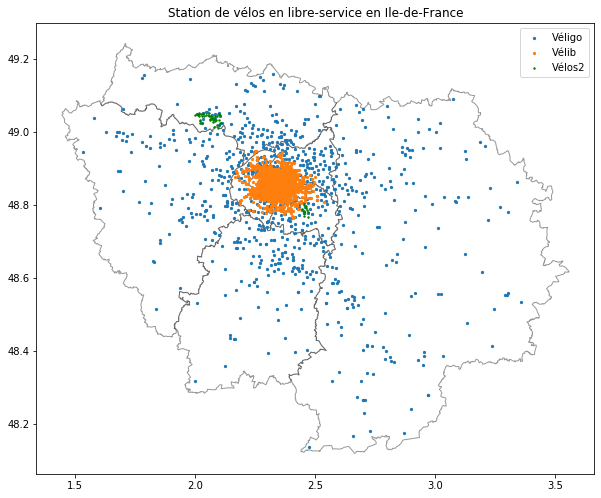

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
dpt.plot(ax=ax, color = 'white', edgecolor = 'black', alpha = 0.4)

velos[velos["type"]=="veligo"].plot(ax=ax, color='tab:blue', label = 'Véligo', markersize=5)
velos[velos["type"]=="velib"].plot(ax=ax, color='tab:orange', label = 'Vélib', markersize=5)
velos[velos["type"]=="velos2"].plot(ax=ax, color='green', label = 'Vélos2', markersize=2)

plt.title('Station de vélos en libre-service en Ile-de-France')
plt.legend()
plt.show()